# Import labraries

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize

from sklearn.datasets import load_iris

In [2]:
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


# Load dataset

In [3]:
data =load_iris()
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
df = pd.DataFrame({
    data["feature_names"][0]:[i[0] for i in data["data"]],
    data["feature_names"][1]:[i[1] for i in data["data"]],
    data["feature_names"][2]:[i[2] for i in data["data"]],
    data["feature_names"][3]:[i[3] for i in data["data"]],
    "label":data["target"]
})
print(df.shape)
df.head()

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df = df.sample(frac=1)

In [6]:
features = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].values
normalized_features = normalize(features,axis=0)
label = df[["label"]].values
normalized_features.shape, features.shape, label.shape

((150, 4), (150, 4), (150, 1))

## visualization

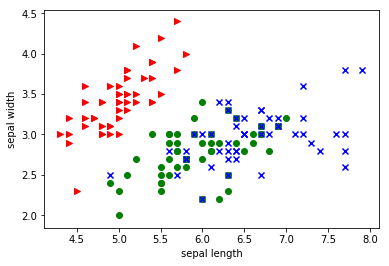

In [7]:
for t in range(3):
    if t == 0:
        c='r'
        marker='>'
    elif t == 1:
        c='g'
        marker='o'
    elif t == 2:
        c='b'
        marker='x'
    plt.scatter(df[df["label"] == t]["sepal length (cm)"].values,
                df[df["label"] == t]["sepal width (cm)"].values,
                marker = marker,
                c = c)
    plt.xlabel("sepal length")
    plt.ylabel("sepal width")
plt.show()

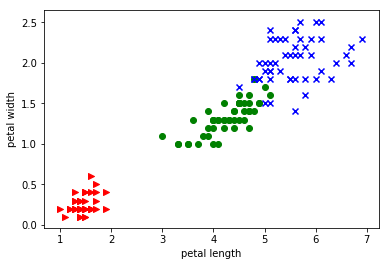

In [8]:
for t in range(3):
    if t == 0:
        c='r'
        marker='>'
    elif t == 1:
        c='g'
        marker='o'
    elif t == 2:
        c='b'
        marker='x'
    plt.scatter(df[df["label"] == t]["petal length (cm)"].values,
                df[df["label"] == t]["petal width (cm)"].values,
                marker = marker,
                c = c)
    plt.xlabel("petal length")
    plt.ylabel("petal width")
plt.show()

# single layer model

## Define model

In [9]:
X = tf.placeholder(tf.float32, [None, 4], name="features")
Y = tf.placeholder(tf.int64, [None, 1], name="label")
Y_one_hot = tf.one_hot(Y, 3)

In [10]:
W1 = tf.Variable(tf.random_normal([4, 3]))
b1 = tf.Variable(tf.random_normal([3]))

In [11]:
L1 = tf.add(tf.matmul(X, W1), b1)
L1 = tf.nn.relu(L1)

model = tf.nn.softmax(L1)

In [12]:
cost = tf.reduce_mean(-tf.reduce_sum(Y_one_hot*tf.log(model), axis=1))
# cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(model, Y_one_hot))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
training = optimizer.minimize(cost)

In [13]:
prediction = tf.argmax(model, axis=1)

## Train

In [15]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(50000):
    none, _cost = sess.run(
        [training, cost], 
        feed_dict={
            X:normalized_features,
            Y:label,
        })
    if step % 1000 == 0:
        print(step, _cost)

0 81.234695
1000 54.936127
2000 54.93099
3000 54.93074
4000 54.930695
5000 54.930676
6000 54.930664
7000 54.93066
8000 54.93066
9000 54.930656
10000 54.930645
11000 54.930645
12000 54.93066
13000 54.930653
14000 54.93064
15000 54.93064
16000 54.93064
17000 54.93064
18000 54.930637
19000 54.930653
20000 54.930637
21000 54.930637
22000 54.930637
23000 54.93063
24000 54.930645
25000 54.93064
26000 54.930637
27000 54.930645
28000 54.93064
29000 54.93064
30000 54.930645
31000 54.93064
32000 54.930634
33000 54.93064
34000 54.930634
35000 54.93064
36000 54.930637
37000 54.930634
38000 54.930637
39000 54.93064
40000 54.93064
41000 54.93063
42000 54.930634
43000 54.930634
44000 54.93064
45000 54.93064
46000 54.930645
47000 54.930634
48000 54.930634
49000 54.930634


## Evaluate

In [16]:
is_correct = tf.equal(prediction, tf.cast(Y, tf.int64))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [17]:
_prediction, _accuracy = sess.run([prediction, accuracy], feed_dict={
    X:features,
    Y:label
})
y_array = label.reshape(150)
print(f"(실제값, 예측값): {[(i,j) for i, j in zip(y_array, _prediction)]}")
print(f"정확도: {_accuracy}")

(실제값, 예측값): [(1, 0), (0, 0), (0, 0), (0, 0), (2, 0), (0, 0), (2, 0), (2, 0), (2, 0), (2, 0), (0, 0), (1, 0), (0, 0), (2, 0), (1, 0), (0, 0), (0, 0), (0, 0), (2, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (2, 0), (1, 0), (1, 0), (2, 0), (2, 0), (2, 0), (1, 0), (1, 0), (1, 0), (0, 0), (2, 0), (1, 0), (2, 0), (1, 0), (0, 0), (0, 0), (2, 0), (0, 0), (1, 0), (1, 0), (2, 0), (2, 0), (1, 0), (0, 0), (2, 0), (0, 0), (2, 0), (2, 0), (0, 0), (2, 0), (1, 0), (1, 0), (0, 0), (2, 0), (1, 0), (0, 0), (1, 0), (0, 0), (0, 0), (2, 0), (2, 0), (1, 0), (2, 0), (2, 0), (1, 0), (2, 0), (2, 0), (1, 0), (1, 0), (0, 0), (0, 0), (1, 0), (2, 0), (2, 0), (1, 0), (2, 0), (0, 0), (2, 0), (1, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (2, 0), (2, 0), (2, 0), (1, 0), (0, 0), (1, 0), (1, 0), (0, 0), (2, 0), (0, 0), (2, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (1, 0), (2, 0), (1, 0), (0, 0), (2, 0), (2, 1), (2, 0), (2, 0), (0, 0), (1, 0), (2, 0), (1, 0), (1, 0), (0,

In [20]:
test = sess.run([Y_one_hot], feed_dict={
    Y:label
})
test[0].shape

(150, 1, 3)

# deep neural network model

## Define model

In [63]:
X = tf.placeholder(tf.float32, name="features")
Y = tf.placeholder(tf.int64, name="label")
Y_one_hot = tf.one_hot(Y, 3)

W1 = tf.Variable(tf.random_normal([4, 32]))
b1 = tf.Variable(tf.random_normal([32]))

W2 = tf.Variable(tf.random_normal([32, 3]))
b2 = tf.Variable(tf.random_normal([3]))

L1 = tf.add(tf.matmul(X, W1), b1)
L1 = tf.nn.relu(L1)
L2 = tf.add(tf.matmul(L1, W2), b2)
L2 = tf.nn.relu(L2)

model = tf.nn.softmax(L2)

In [64]:
cost = tf.reduce_mean(-tf.reduce_sum(Y_one_hot*tf.log(model), axis=1))
# cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(model, Y_one_hot))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
training = optimizer.minimize(cost)

In [65]:
prediction = tf.argmax(model, axis=1)
is_correct = tf.equal(prediction, tf.cast(Y, tf.int64))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

## Train

In [66]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(10000):
    none, _cost = sess.run(
        [training, cost], 
        feed_dict={
            X: features,
            Y: label
        })
    if step % 100 == 0:
        print(step, _cost)


0 167.30444
100 54.93064
200 54.93064
300 54.93064
400 54.93064
500 54.93064
600 54.93064
700 54.93064
800 54.93064
900 54.93064
1000 54.93064
1100 54.93064
1200 54.93064
1300 54.93064
1400 54.93064
1500 54.93064
1600 54.93064
1700 54.93064
1800 54.93064
1900 54.93064
2000 54.93064
2100 54.93064
2200 54.93064
2300 54.93064
2400 54.93064
2500 54.93064
2600 54.93064
2700 54.93064
2800 54.93064
2900 54.93064
3000 54.93064
3100 54.93064
3200 54.93064
3300 54.93064
3400 54.93064
3500 54.93064
3600 54.93064
3700 54.93064
3800 54.93064
3900 54.93064
4000 54.93064
4100 54.93064
4200 54.93064
4300 54.93064
4400 54.93064
4500 54.93064
4600 54.93064
4700 54.93064
4800 54.93064
4900 54.93064
5000 54.93064
5100 54.93064
5200 54.93064
5300 54.93064
5400 54.93064
5500 54.93064
5600 54.93064
5700 54.93064
5800 54.93064
5900 54.93064
6000 54.93064
6100 54.93064
6200 54.93064
6300 54.93064
6400 54.93064
6500 54.93064
6600 54.93064
6700 54.93064
6800 54.93064
6900 54.93064
7000 54.93064
7100 54.93064
720

## Evaluate

In [67]:
_prediction, _accuracy = sess.run([prediction, accuracy], feed_dict={
    X:features,
    Y:label
})
y_array = label.reshape(150)
print(f"(실제값, 예측값): {[(i,j) for i, j in zip(y_array, _prediction)]}")
print(f"정확도: {_accuracy}")

(실제값, 예측값): [(1, 0), (0, 0), (1, 0), (2, 0), (1, 0), (2, 0), (0, 0), (0, 0), (2, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (2, 0), (0, 0), (2, 0), (1, 0), (2, 0), (2, 0), (0, 0), (0, 0), (1, 0), (1, 0), (2, 0), (0, 0), (2, 0), (0, 0), (1, 0), (2, 0), (2, 0), (2, 0), (0, 0), (0, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (0, 0), (2, 0), (2, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (2, 0), (1, 0), (0, 0), (0, 0), (1, 0), (0, 0), (2, 0), (0, 0), (2, 0), (2, 0), (1, 0), (2, 0), (1, 0), (1, 0), (0, 0), (0, 0), (2, 0), (1, 0), (1, 0), (0, 0), (1, 0), (0, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (2, 0), (0, 0), (2, 0), (2, 0), (2, 0), (1, 0), (1, 0), (0, 0), (1, 0), (2, 0), (1, 0), (2, 0), (2, 0), (2, 0), (1, 0), (1, 0), (0, 0), (2, 0), (0, 0), (2, 0), (2, 0), (2, 0), (0, 0), (2, 0), (2, 0), (2, 0), (2, 0), (1, 0), (1, 0), (0, 0), (2, 0), (2, 0), (1, 0), (0, 0), (2, 0), (0, 0), (2, 0), (2, 0), (0, 0), (1, 0), (1, 0), (1,